In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import choices
import pickle

D:\python\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_tl = pd.read_excel('D:/UW/project/6ppd-experiments/tl/20201021_Tire_leaching_data.xlsx')
df_oz = pd.read_excel('D:/UW/project/6ppd-experiments/ozonation/20201021-ozonation-6ppd.xlsx')

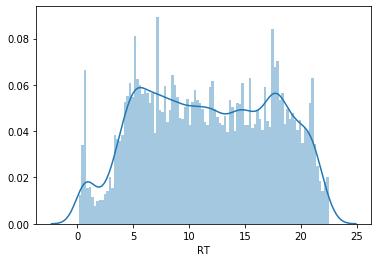

In [3]:
sns.distplot(df_tl.RT,bins=100);

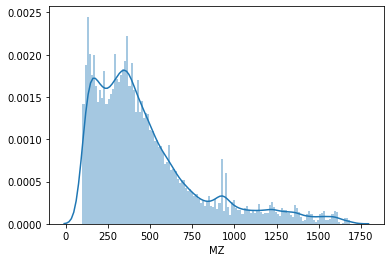

In [4]:
sns.distplot(df_tl.MZ,bins=128);

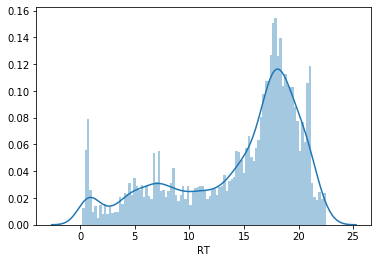

In [5]:
sns.distplot(df_oz.RT,bins=100);

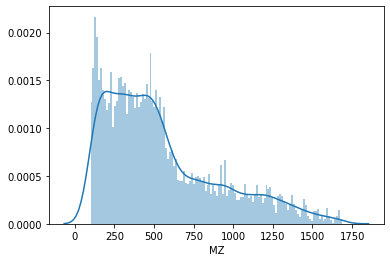

In [31]:
sns.distplot(df_oz.MZ,bins=128);

In [6]:
df_na = pd.read_excel('D:/UW/massmotif/mzml/20201106_raw_DRO_DIE.xlsx')

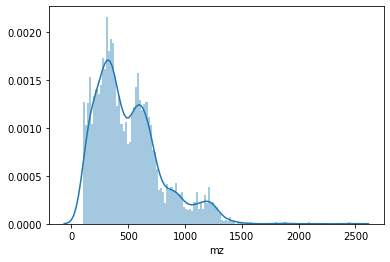

In [33]:
sns.distplot(df_na.mz,bins=128);

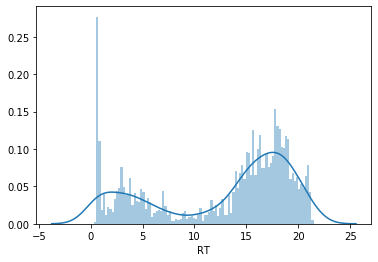

In [34]:
sns.distplot(df_na.RT,bins=100);

In [7]:
df_0815 = pd.read_csv('D:/UW/directproject/example_data/clustering/sample0815.csv')
df_1114 = pd.read_csv('D:/UW/directproject/example_data/clustering/sample1114.csv')
df_kathy = pd.read_csv('D:/UW/project/New projects 20200714/exported data in wide format/MSpos-AFFF4_wide_features_all-data_for-Ximin.csv')

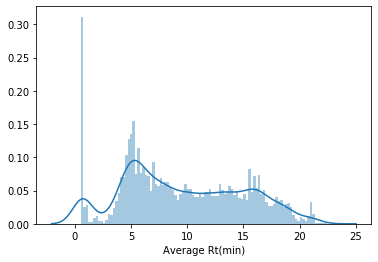

In [36]:
sns.distplot(df_0815['Average Rt(min)'],bins=100);

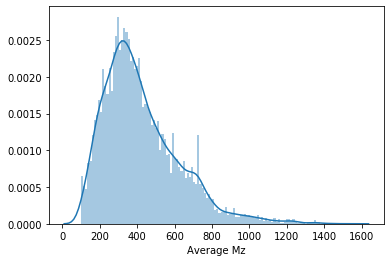

In [37]:
sns.distplot(df_0815['Average Mz'],bins=128);

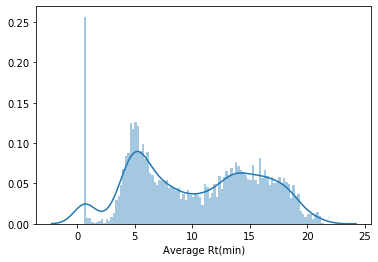

In [38]:
sns.distplot(df_1114['Average Rt(min)'],bins=100);

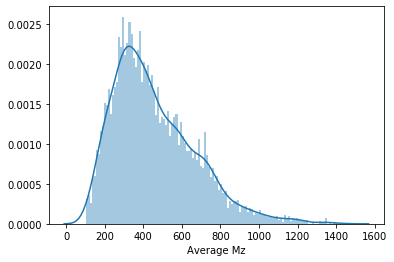

In [39]:
sns.distplot(df_1114['Average Mz'],bins=128);

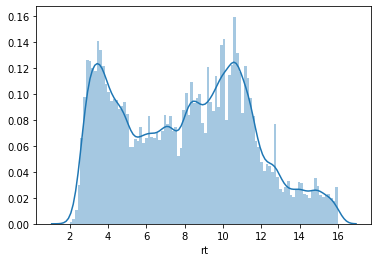

In [40]:
sns.distplot(df_kathy.rt,bins=100);

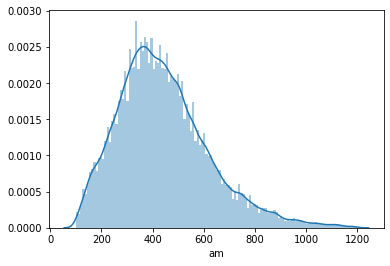

In [41]:
sns.distplot(df_kathy.am,bins=128);

In [8]:
totrt = list(df_tl.RT) + list(df_oz.RT) + list(df_na.RT) + list(df_kathy.rt) + list(df_0815['Average Rt(min)']) + list(df_1114['Average Rt(min)'])
totmz = list(df_tl.MZ) + list(df_oz.MZ) + list(df_na.mz) + list(df_kathy.am) + list(df_0815['Average Mz']) + list(df_1114['Average Mz'])

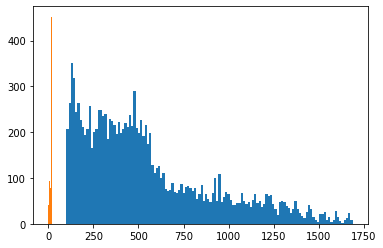

In [125]:
counts_mz, bins_mz, bars = plt.hist(df_oz.MZ, bins=128)
counts_rt, bins_rt, bars = plt.hist(df_oz.RT, bins=100)

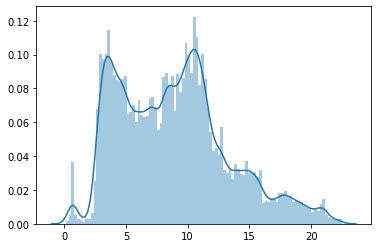

In [89]:
sns.distplot(totrt,bins=100);

In [9]:
print('tl data',df_tl.shape)
print('oz data',df_oz.shape)
print('nina data',df_na.shape)
print('0815 data',df_0815.shape)
print('1114 data',df_1114.shape)
print('kathy data',df_kathy.shape)

tl data (24042, 16)
oz data (13103, 18)
nina data (3808, 57)
0815 data (12054, 127)
1114 data (8490, 157)
kathy data (207918, 172)


In [110]:
#Generating random mz & rt -- source
source_pair = []
for i in np.arange(0,20,1):
    s = 200
    rdm_mz = np.random.choice(bins_mz[:-1], size=s, p=[i/counts_mz.sum() for i in counts_mz])
    rdm_mz_adj = [i+np.random.uniform(0, bins_mz[1] - bins_mz[0]) for i in rdm_mz]
    rdm_rt = np.random.choice(bins_rt[:-1], size=s, p=[i/counts_rt.sum() for i in counts_rt])
    rdm_rt_adj = [i+np.random.uniform(0, bins_rt[1] - bins_rt[0]) for i in rdm_rt]
    source_pair.append([rdm_mz_adj, rdm_rt_adj])

In [126]:
#Generating random mz & rt -- background tot
background_pair = []
for i in np.arange(0,200,1):
    s = 10000
    rdm_mz = np.random.choice(bins_mz[:-1], size=s, p=[i/counts_mz.sum() for i in counts_mz])
    rdm_mz_adj = [i+np.random.uniform(0, bins_mz[1] - bins_mz[0]) for i in rdm_mz]
    rdm_rt = np.random.choice(bins_rt[:-1], size=s, p=[i/counts_rt.sum() for i in counts_rt])
    rdm_rt_adj = [i+np.random.uniform(0, bins_rt[1] - bins_rt[0]) for i in rdm_rt]
    background_pair.append([rdm_mz_adj, rdm_rt_adj])

In [127]:
with open('background_oz_pattern.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(background_pair, filehandle)

In [11]:
with open('./dummydata/sourcepair.data', 'rb') as filehandle:
    # read the data as binary data stream
    test = pickle.load(filehandle)

In [15]:
len(test)

20

In [ ]:
#Generate missing source
#generate shifting source
#Generate intensity?